In [1]:
pip install tensorflow==2.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0

In [2]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report



#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D,Concatenate

import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras import optimizers

In [4]:
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_path6 = '/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/ADNIMERGE.csv'
figures_path = './figures'

In [7]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [8]:
Data = pd.read_csv(data_path6)

In [9]:
Data

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36665,NaN,NaN,0.000000,0.00000,0,0,2019-02-14 23:58:27.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.000000,0.00000,0,0,2019-02-14 23:58:27.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.498289,5.96721,6,6,2019-02-14 23:58:27.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,0.999316,11.96720,12,12,2019-02-14 23:58:27.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.08355,NaN,NaN,1.998630,23.93440,24,24,2019-02-14 23:58:27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910,4384,029_S_4384,m84,29,ADNI3,ADNI2,2019-04-09,CN,62.3,Male,...,109.3,9.86,1.12969,NaN,1.06225,7.167690,85.83610,84,84,2019-04-10 04:36:05.0
13911,6703,135_S_6703,bl,135,ADNI3,ADNI3,2019-04-09,NaN,62.7,Female,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,0,0,2019-04-10 04:36:10.0
13912,6145,014_S_6145,m12,14,ADNI3,ADNI3,2019-04-09,CN,70.3,Female,...,NaN,NaN,NaN,NaN,NaN,1.073240,12.85250,12,12,2019-04-11 04:36:24.0
13913,6148,014_S_6148,m12,14,ADNI3,ADNI3,2019-04-05,SMC,81.5,Female,...,NaN,NaN,NaN,NaN,NaN,1.081450,12.95080,12,12,2019-04-11 04:36:24.0


In [10]:
df=Data[["AGE","PTGENDER","PTEDUCAT", "PTMARRY","APOE4",
        "ADAS11","ADAS13","ADASQ4","MMSE","FAQ", "MOCA",
        "CDRSB","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting",
        "RAVLT_perc_forgetting","LDELTOTAL", "TRABSCOR","mPACCdigit"
        ,"mPACCtrailsB","Ventricles", "Hippocampus","WholeBrain", "Entorhinal",
        "Fusiform", "MidTemp", "ICV","DX_bl"]]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
LabelEncoder_1=LabelEncoder()
df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])
LabelEncoder_1=LabelEncoder()
df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])

In [13]:
df=df.dropna()

In [14]:
df.drop(df[df['DX_bl']=="SMC"].index,inplace=True)
df.drop(df[df['DX_bl']=="AD"].index,inplace=True)
df.drop(df[df['DX_bl']=="EMCI"].index,inplace=True)

In [15]:
Labels = df['DX_bl'].values
Features = df.drop(['DX_bl'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (1028, 27)
Labels shape: (1028,)


In [16]:
df['DX_bl'].value_counts()

CN      583
LMCI    445
Name: DX_bl, dtype: int64

In [17]:
Features

array([[7.09000e+01, 0.00000e+00, 1.30000e+01, ..., 1.16870e+04,
        1.37120e+04, 1.24894e+06],
       [7.29000e+01, 1.00000e+00, 1.60000e+01, ..., 1.82410e+04,
        2.24400e+04, 1.68850e+06],
       [7.06000e+01, 1.00000e+00, 1.60000e+01, ..., 1.99990e+04,
        2.16360e+04, 1.52995e+06],
       ...,
       [6.65000e+01, 1.00000e+00, 2.00000e+01, ..., 2.02230e+04,
        2.07250e+04, 1.63050e+06],
       [6.65000e+01, 1.00000e+00, 2.00000e+01, ..., 1.98390e+04,
        2.06570e+04, 1.62854e+06],
       [5.59000e+01, 1.00000e+00, 1.90000e+01, ..., 1.91960e+04,
        1.63550e+04, 1.54418e+06]])

In [18]:
for i in range(len(Labels)):
  if Labels[i]=="LMCI":
    Labels[i]=0
  if Labels[i]=="CN":
    Labels[i]=1

In [19]:
LabelDataFrame=pd.DataFrame(Labels)

In [20]:
LabelDataFrame

,0
0,1
1,1
2,1
3,1
4,1
...,...
1023,1
1024,1
1025,1
1026,1


In [21]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [22]:
LabelDataFrame[0].value_counts()

1    583
0    445
Name: 0, dtype: int64

In [23]:
from sklearn.utils.multiclass import type_of_target

Labels= Labels[:].astype(int)


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=45)

X_sm, y_sm = sm.fit_resample(Features, Labels)

print(f'''Shape of X before SMOTE: {Features.shape}
Shape of X after SMOTE: {X_sm.shape}''')
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Shape of X before SMOTE: (1028, 27)
Shape of X after SMOTE: (1166, 27)
Train data shape: (932, 27)
Train labels shape: (932,)
Test data shape: (234, 27)
Test labels shape: (234,)


In [24]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(932, 27)

In [26]:
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [27]:
X_train.shape

(932, 27, 1)

In [28]:
#classes
classes = [0, 1]

In [29]:
y_train[:].dtype

dtype('int64')

In [30]:
y_test[:].dtype

dtype('int64')

In [31]:
from sklearn.utils.multiclass import type_of_target
target_type = type_of_target(y_train[:])
print("Type of target:", target_type)
y_train= y_train[:].astype(int)
y_test=y_test[:].astype(int)

Type of target: binary


In [32]:
type_of_target(y_train)

'binary'

In [33]:
type_of_target(y_test)

'binary'

In [34]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
       # model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        clc=classification_report(y_test, y_pred,labels=[1, 2, 3],digits=4)
        print(clc)
        print('accuracy_score: {0:.4f}'.format(acc_score))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [35]:
from keras.layers import GlobalAveragePooling2D,ReLU
num_clases=2
vec=16
class DigitCapsuleLayer(Layer):
    # creating a layer class in keras
    def __init__(self, **kwargs):
        super(DigitCapsuleLayer, self).__init__(**kwargs)
        self.kernel_initializer = initializers.get('glorot_uniform')

    def build(self, input_shape):
        # initialize weight matrix for each capsule in lower layer
        self.W = self.add_weight(shape = [1,1,num_clases, vec, 256], initializer = self.kernel_initializer, name = 'weights') #:c
        self.built = True

    def call(self, inputs):
        #print(inputs.shape)
        u = tf.reshape(inputs, (-1, 1, 256)) # u.shape: (None, 1152, 8) #:c

        u = tf.expand_dims(u, axis=-2) # u.shape: (None, 1152, 1, 8)
        #print(u.shape)
        u = tf.expand_dims(u, axis=-1) # u.shape: (None, 1152, 1, 8, 1)
        u_hat = tf.matmul(self.W, u) # u_hat.shape: (None, 1152, 10, 16, 1)
        u_hat = tf.squeeze(u_hat, [4]) # u_hat.shape: (None, 1152, 10, 16)
        b = tf.zeros(shape = [K.shape(inputs)[0],2, num_clases, 1])

# routing algorithm with updating coupling coefficient c, using scalar product b/w input capsule and output capsule
        for i in range(3-1):
            c = tf.nn.softmax(b, axis=-2) # c.shape: (None, 1152, 10, 1)
            s = tf.reduce_sum(tf.multiply(c, u_hat), axis=1, keepdims=True) # s.shape: (None, 1, 10, 16)
            v = squash(s) # v.shape: (None, 1, 10, 16)
            agreement = tf.squeeze(tf.matmul(tf.expand_dims(u_hat, axis=-1), tf.expand_dims(v, axis=-1), transpose_a=True), [4]) # agreement.shape: (None, 1152, 10, 1)
            b += agreement

        return v

    def compute_output_shape(self, input_shape):
        return tuple([None, num_clases, vec])

epsilon = 1e-7

def output_layer(inputs):
    return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

def squash(inputs):
    # take norm of input vectors
    squared_norm = tf.keras.backend.sum(tf.keras.backend.square(inputs), axis = -1, keepdims = True)

    # use the formula for non-linear function to return squashed output
    return ((squared_norm/(1+squared_norm))/(K.sqrt(squared_norm+K.epsilon())))*inputs

def safe_norm(v, axis=-1, epsilon=1e-7):
    v_ = tf.reduce_sum(tf.square(v), axis = axis, keepdims=True)
    return tf.sqrt(v_ + epsilon)


In [36]:


class KerasBatchClassifier(KerasClassifier, BaseEstimator):
    def __init__(self, model, **kwargs):
        super().__init__(model)
        self.fit_kwargs = kwargs
        self._estimator_type = 'classifier'

    def fit(self, x, y, *args, **kwargs):
        y = np.array(y)
        if len(y.shape) == 2 and y.shape[1] > 1:
          self.classes_ = np.arange(y.shape[1])
        elif (len(y.shape) == 2 and y.shape[1] == 1) or len(y.shape) == 1:
          self.classes_ = np.unique(y)
          y = np.searchsorted(self.classes_, y)
        else:
          raise ValueError('Invalid shape for y: ' + str(y.shape))
        self.n_classes_ = len(self.classes_)
        return super(KerasClassifier, self).fit(x, y, **self.fit_kwargs)


# RED NEURONAL
def FullyConnected():


  inputs = Input(shape=(X_train.shape[1],1), name="input_1")


  Layer_1=tf.keras.layers.Conv1D(8,3,activation="selu",padding="same")(inputs)


#16

  Layer_1=tf.keras.layers.Conv1D(16,3,activation="selu",padding="same")(Layer_1)

#32

  Layer_1=tf.keras.layers.Conv1D(32,3,activation="selu",padding="same")(Layer_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#64

  Layer_1=tf.keras.layers.Conv1D(64,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#128

  Layer_1=tf.keras.layers.Conv1D(128,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

#256

  Layer_1=tf.keras.layers.Conv1D(256,3,activation="selu",padding="same")(Pool_1)
  Pool_1=tf.keras.layers.MaxPool1D(2)(Layer_1)
  Pool_1=tf.keras.layers.Dropout(rate=0.5)(Pool_1)

  squashed_output = tf.keras.layers.Lambda(squash)(Pool_1)
  digit_caps = DigitCapsuleLayer()(squashed_output)
  Acont= safe_norm(digit_caps)
  mast = tf.reshape(Acont, (-1,Acont.shape[2],Acont.shape[3]))
  outputs = tf.keras.layers.Lambda(output_layer)(mast)
  model = Model(inputs = inputs, outputs = outputs)

  optimizer=Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

KerasBatchClassifier(build_fn=<function FullyConnected at 0x784b1411fac0>)
Epoch 1/500
4/4 - 13s - loss: 0.7033 - accuracy: 0.5579 - 13s/epoch - 3s/step
Epoch 2/500
4/4 - 0s - loss: 0.6358 - accuracy: 0.6416 - 31ms/epoch - 8ms/step
Epoch 3/500
4/4 - 0s - loss: 0.5832 - accuracy: 0.7167 - 30ms/epoch - 8ms/step
Epoch 4/500
4/4 - 0s - loss: 0.5462 - accuracy: 0.7554 - 32ms/epoch - 8ms/step
Epoch 5/500
4/4 - 0s - loss: 0.5206 - accuracy: 0.7575 - 30ms/epoch - 8ms/step
Epoch 6/500
4/4 - 0s - loss: 0.5177 - accuracy: 0.7725 - 30ms/epoch - 7ms/step
Epoch 7/500
4/4 - 0s - loss: 0.5071 - accuracy: 0.7758 - 31ms/epoch - 8ms/step
Epoch 8/500
4/4 - 0s - loss: 0.4983 - accuracy: 0.7876 - 29ms/epoch - 7ms/step
Epoch 9/500
4/4 - 0s - loss: 0.4735 - accuracy: 0.7800 - 30ms/epoch - 7ms/step
Epoch 10/500
4/4 - 0s - loss: 0.4885 - accuracy: 0.7790 - 33ms/epoch - 8ms/step
Epoch 11/500
4/4 - 0s - loss: 0.4752 - accuracy: 0.7833 - 32ms/epoch - 8ms/step
Epoch 12/500
4/4 - 0s - loss: 0.4748 - accuracy: 0.8026

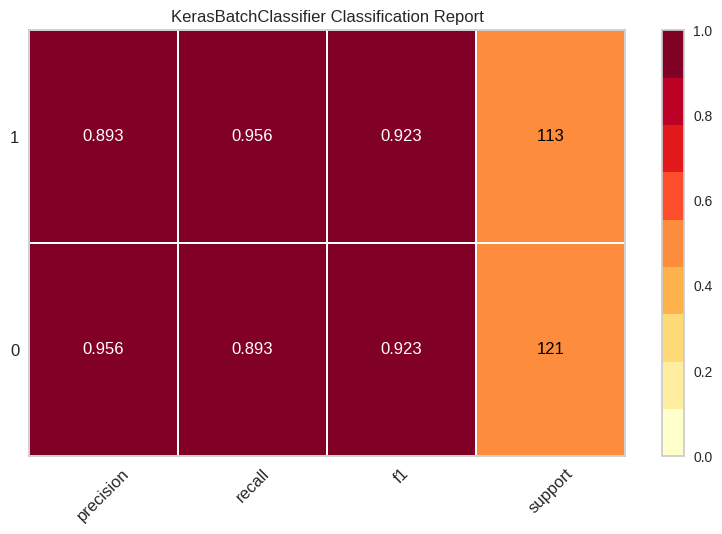

8/8 [==============================] - 0s 4ms/step - loss: 0.2713 - accuracy: 0.9231


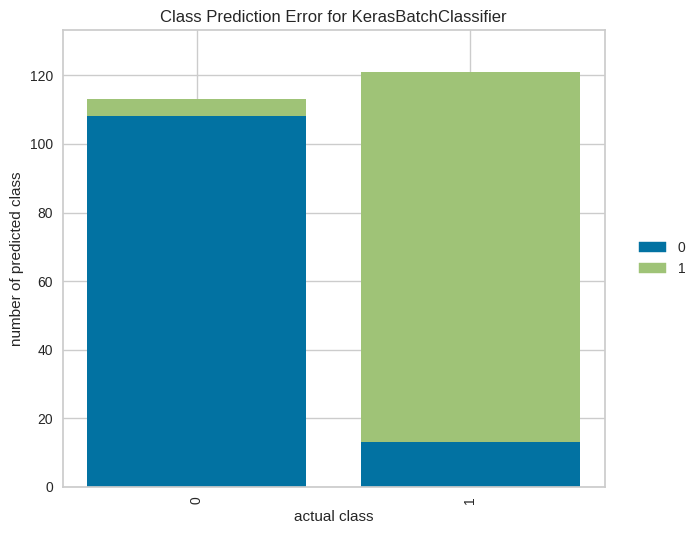

8/8 [==============================] - 0s 3ms/step


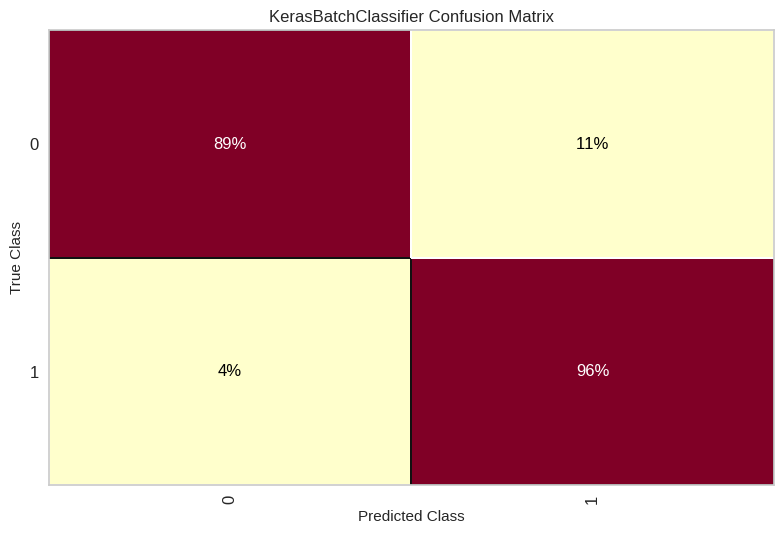

8/8 [==============================] - 0s 3ms/step


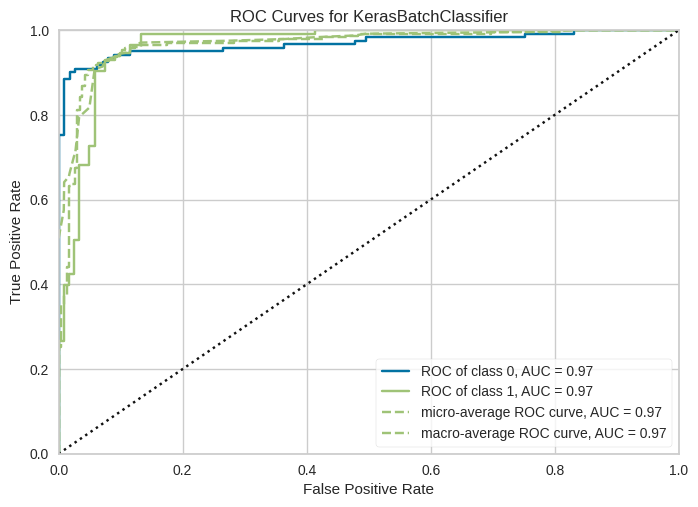

In [37]:
classifiers=[KerasBatchClassifier(FullyConnected, epochs=500, batch_size=256, verbose=2)]
names = ['FNN']
classifier_metrics()
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]